In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
DATA_DIR = Path("fred_streamlit/data")

In [5]:
SERIES = {
    'VIX': 'VIXCLS.csv',
    'AAA_Spread': 'AAA10Y.csv',
    'BAA_Spread': 'BAA10Y.csv',
    'High_Yield_Spread': 'BAMLH0A0HYM2.csv',
}

In [7]:

def load_data():
    dfs = []
    for name, filename in SERIES.items():
        path = DATA_DIR / filename
        if not path.exists():
            print(f"❌ File not found: {filename}")
            return None
        df = pd.read_csv(path, parse_dates=['date'])
        df = df[['date', 'value']].rename(columns={'value': name})
        dfs.append(df)
    # Merge on date
    df_merged = dfs[0]
    for df in dfs[1:]:
        df_merged = pd.merge(df_merged, df, on='date', how='inner')
    df_merged = df_merged.set_index('date').dropna()
    return df_merged

In [9]:
def main():
    print("\n🚀 Loading data and computing correlations...")
    df = load_data()
    if df is None:
        print("❌ Could not load all required data files.")
        return
    print(f"Data loaded: {df.shape[0]} rows, columns: {list(df.columns)}")
    print("\nCorrelation matrix:")
    corr = df.corr()
    print(corr.round(3))

    # Save correlation matrix
    corr.to_csv('vix_credit_correlation_matrix.csv')
    print("\n✅ Correlation matrix saved as vix_credit_correlation_matrix.csv")

    # Plot heatmap
    plt.figure(figsize=(6, 5))
    plt.title('Correlation Matrix: VIX and Credit Spreads')
    import seaborn as sns
    sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
    plt.tight_layout()
    plt.savefig('vix_credit_correlation_heatmap.png', dpi=150)
    print("✅ Heatmap saved as vix_credit_correlation_heatmap.png")


🚀 Loading data and computing correlations...
Data loaded: 2493 rows, columns: ['VIX', 'AAA_Spread', 'BAA_Spread', 'High_Yield_Spread']

Correlation matrix:
                     VIX  AAA_Spread  BAA_Spread  High_Yield_Spread
VIX                1.000       0.270       0.379              0.476
AAA_Spread         0.270       1.000       0.907              0.755
BAA_Spread         0.379       0.907       1.000              0.930
High_Yield_Spread  0.476       0.755       0.930              1.000

✅ Correlation matrix saved as vix_credit_correlation_matrix.csv
✅ Heatmap saved as vix_credit_correlation_heatmap.png


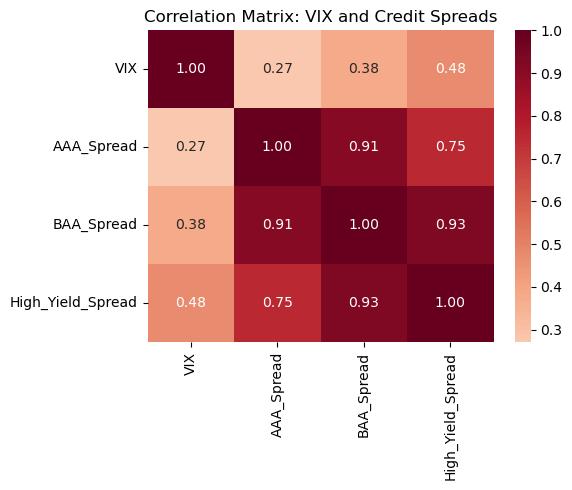

In [11]:
main()